In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import SVMSMOTE

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 23s 99us/step - loss: 0.0016 - val_loss: 3.2866e-04
Epoch 2/150
227845/227845 [==============================] - 21s 93us/step - loss: 2.1786e-04 - val_loss: 1.8358e-04
Epoch 3/150
227845/227845 [==============================] - 21s 94us/step - loss: 1.4316e-04 - val_loss: 1.2768e-04
Epoch 4/150
227845/227845 [==============================] - 21s 93us/step - loss: 1.1146e-04 - val_loss: 1.0849e-04
Epoch 5/150
227845/227845 [==============================] - 22s 97us/step - loss: 1.0150e-04 - val_loss: 1.1463e-04
Epoch 6/150
227845/227845 [==============================] - 22s 96us/step - loss: 9.4310e-05 - val_loss: 8.8840e-05
Epoch 7/150
227845/227845 [===================

227845/227845 [==============================] - 21s 92us/step - loss: 3.9382e-05 - val_loss: 4.0841e-05
Epoch 69/150
227845/227845 [==============================] - 21s 90us/step - loss: 3.9353e-05 - val_loss: 4.5881e-05
Epoch 70/150
227845/227845 [==============================] - 22s 97us/step - loss: 3.9093e-05 - val_loss: 3.7626e-05
Epoch 71/150
227845/227845 [==============================] - 22s 95us/step - loss: 3.9030e-05 - val_loss: 5.0738e-05
Epoch 72/150
227845/227845 [==============================] - 21s 94us/step - loss: 3.8889e-05 - val_loss: 4.9829e-05
Epoch 73/150
227845/227845 [==============================] - 22s 95us/step - loss: 3.8891e-05 - val_loss: 5.4607e-05
Epoch 74/150
227845/227845 [==============================] - 21s 94us/step - loss: 3.8803e-05 - val_loss: 1.6695e-04
Epoch 75/150
227845/227845 [==============================] - 21s 93us/step - loss: 3.8939e-05 - val_loss: 4.4706e-05
Epoch 76/150
227845/227845 [==============================] - 21s 93u

227845/227845 [==============================] - 21s 90us/step - loss: 3.5161e-05 - val_loss: 3.6091e-05
Epoch 138/150
227845/227845 [==============================] - 20s 90us/step - loss: 3.5311e-05 - val_loss: 3.8599e-05
Epoch 139/150
227845/227845 [==============================] - 20s 90us/step - loss: 3.6023e-05 - val_loss: 4.3567e-05
Epoch 140/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.7487e-05 - val_loss: 3.6752e-05
Epoch 141/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.6759e-05 - val_loss: 3.8630e-05
Epoch 142/150
227845/227845 [==============================] - 20s 90us/step - loss: 3.4946e-05 - val_loss: 3.7384e-05
Epoch 143/150
227845/227845 [==============================] - 20s 89us/step - loss: 3.6786e-05 - val_loss: 7.7175e-05
Epoch 144/150
227845/227845 [==============================] - 21s 90us/step - loss: 3.5563e-05 - val_loss: 3.2816e-05
Epoch 145/150
227845/227845 [==============================] -

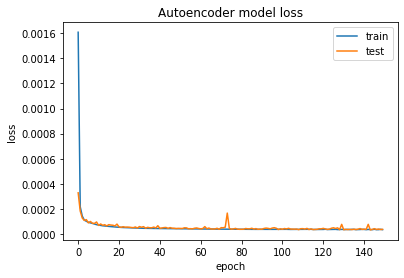

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 49s 214us/step - loss: 0.0273 - accuracy: 0.9938 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 2/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0075 - accuracy: 0.9988 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 3/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0063 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 4/50
227845/227845 [==============================] - 46s 202us/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 5/50
227845/227845 [==============================] - 46s 202us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9994
Epoch 6/50
227845/227845 [==============================] - 46s 203us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 7/50
227845/227845 [=================

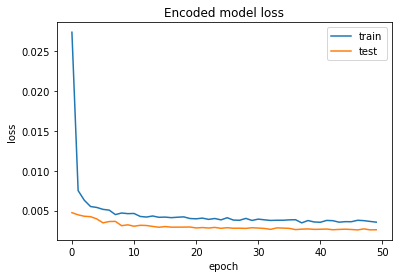

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994908886626171


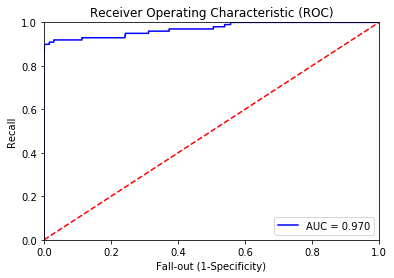

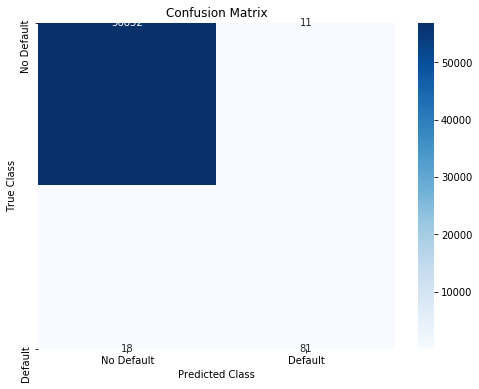

AUC(ROC): 0.9089941853865672
Precision: 0.8804347826086957
Recall: 0.8181818181818182
F1 score: 0.8481675392670157
False positives: 11
True positives: 81
False negatives: 18
True negatives: 56852
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227845 samples, validate on 56962 samples
Epoch 1/150
227845/227845 [==============================] - 23s 99us/step - loss: 0.0018 - val_loss: 3.9389e-04
Epoch 2/150
227845/227845 [==============================] - 22s 96us/step - loss: 2.2943e-04 - val_loss: 1.7651e-04
Epoch 3/150
227845/227845 [==============================] - 22s 95us/step - loss: 1.4438e-04 - val_loss: 1.3130e-04
Epoch 4/150
227845/227845 [==============================] - 22s 96us/step - loss: 1.2750e-04 - val_loss: 1.2238e-04
Epoch 5/150
227845/227845 [==============================] - 22s 95us/step - loss: 1.1662e-04 - val_loss: 1.0856e-04
Epoch 6/150
227845/227845 [==============================] - 22s 96us/step - loss: 1.0721e-04 - val_loss: 1.1067e-04
Epoch 7/150
227845/227845 [===================

227845/227845 [==============================] - 22s 95us/step - loss: 3.7519e-05 - val_loss: 4.1341e-05
Epoch 69/150
227845/227845 [==============================] - 21s 93us/step - loss: 3.7162e-05 - val_loss: 3.7797e-05
Epoch 70/150
227845/227845 [==============================] - 22s 94us/step - loss: 3.6985e-05 - val_loss: 4.0616e-05
Epoch 71/150
227845/227845 [==============================] - 21s 94us/step - loss: 3.6689e-05 - val_loss: 3.4338e-05
Epoch 72/150
227845/227845 [==============================] - 22s 95us/step - loss: 3.6483e-05 - val_loss: 3.8205e-05
Epoch 73/150
227845/227845 [==============================] - 22s 96us/step - loss: 3.6118e-05 - val_loss: 3.9989e-05
Epoch 74/150
227845/227845 [==============================] - 22s 94us/step - loss: 3.6118e-05 - val_loss: 3.3248e-05
Epoch 75/150
227845/227845 [==============================] - 22s 95us/step - loss: 3.5455e-05 - val_loss: 3.3349e-05
Epoch 76/150
227845/227845 [==============================] - 21s 94u

227845/227845 [==============================] - 19s 82us/step - loss: 3.1128e-05 - val_loss: 3.7203e-05
Epoch 138/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.1399e-05 - val_loss: 3.2069e-05
Epoch 139/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.1322e-05 - val_loss: 5.0087e-05
Epoch 140/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.1498e-05 - val_loss: 3.2942e-05
Epoch 141/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.0962e-05 - val_loss: 5.7053e-05
Epoch 142/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.1013e-05 - val_loss: 3.8007e-05
Epoch 143/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.1094e-05 - val_loss: 3.3398e-05
Epoch 144/150
227845/227845 [==============================] - 19s 82us/step - loss: 3.1060e-05 - val_loss: 2.8607e-05
Epoch 145/150
227845/227845 [==============================] -

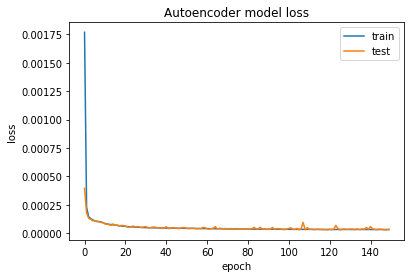

Train on 227845 samples, validate on 56962 samples
Epoch 1/50
227845/227845 [==============================] - 42s 184us/step - loss: 0.0355 - accuracy: 0.9913 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 2/50
227845/227845 [==============================] - 41s 180us/step - loss: 0.0083 - accuracy: 0.9985 - val_loss: 0.0035 - val_accuracy: 0.9994
Epoch 3/50
227845/227845 [==============================] - 41s 180us/step - loss: 0.0068 - accuracy: 0.9987 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 4/50
227845/227845 [==============================] - 42s 185us/step - loss: 0.0061 - accuracy: 0.9989 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 5/50
227845/227845 [==============================] - 42s 185us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0029 - val_accuracy: 0.9995
Epoch 6/50
227845/227845 [==============================] - 42s 186us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/50
227845/227845 [=================

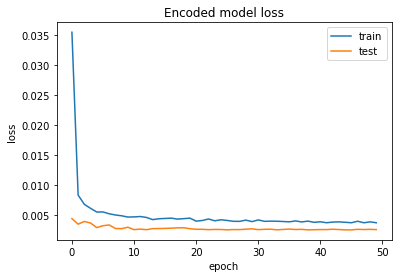

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995259997893332


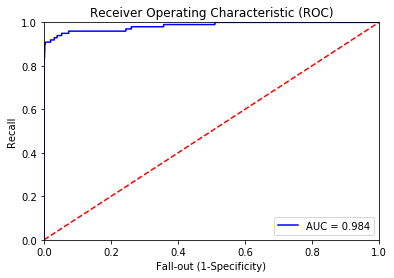

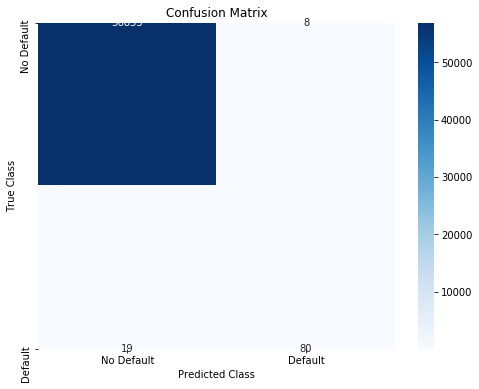

AUC(ROC): 0.9039700595281552
Precision: 0.9090909090909091
Recall: 0.8080808080808081
F1 score: 0.8556149732620321
False positives: 8
True positives: 80
False negatives: 19
True negatives: 56855
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 20s 86us/step - loss: 0.0018 - val_loss: 3.3639e-04
Epoch 2/150
227846/227846 [==============================] - 19s 83us/step - loss: 2.5555e-04 - val_loss: 1.9535e-04
Epoch 3/150
227846/227846 [==============================] - 19s 83us/step - loss: 1.5886e-04 - val_loss: 1.3095e-04
Epoch 4/150
227846/227846 [==============================] - 19s 84us/step - loss: 1.2558e-04 - val_loss: 1.2555e-04
Epoch 5/150
227846/227846 [==============================] - 19s 84us/step - loss: 1.1698e-04 - val_loss: 1.1807e-04
Epoch 6/150
227846/227846 [==============================] - 19s 84us/step - loss: 1.0446e-04 - val_loss: 9.9614e-05
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 19s 83us/step - loss: 4.0684e-05 - val_loss: 6.5848e-05
Epoch 69/150
227846/227846 [==============================] - 19s 83us/step - loss: 4.0488e-05 - val_loss: 5.9048e-05
Epoch 70/150
227846/227846 [==============================] - 19s 83us/step - loss: 4.0346e-05 - val_loss: 4.4108e-05
Epoch 71/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.9956e-05 - val_loss: 3.6723e-05
Epoch 72/150
227846/227846 [==============================] - 19s 83us/step - loss: 4.0083e-05 - val_loss: 3.8040e-05
Epoch 73/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.9867e-05 - val_loss: 4.4405e-05
Epoch 74/150
227846/227846 [==============================] - 19s 83us/step - loss: 4.0122e-05 - val_loss: 3.5940e-05
Epoch 75/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.9860e-05 - val_loss: 5.0377e-05
Epoch 76/150
227846/227846 [==============================] - 19s 83u

227846/227846 [==============================] - 19s 83us/step - loss: 3.2998e-05 - val_loss: 3.5152e-05
Epoch 138/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.2352e-05 - val_loss: 3.8000e-05
Epoch 139/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.2831e-05 - val_loss: 2.9192e-05
Epoch 140/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.2432e-05 - val_loss: 2.9588e-05
Epoch 141/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.2422e-05 - val_loss: 3.6184e-05
Epoch 142/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.2407e-05 - val_loss: 3.0262e-05
Epoch 143/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.2364e-05 - val_loss: 3.0282e-05
Epoch 144/150
227846/227846 [==============================] - 18s 80us/step - loss: 3.2642e-05 - val_loss: 3.4065e-05
Epoch 145/150
227846/227846 [==============================] -

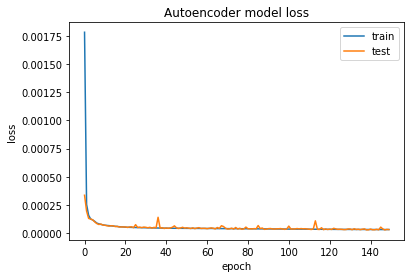

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 44s 192us/step - loss: 0.0361 - accuracy: 0.9899 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 2/50
227846/227846 [==============================] - 43s 190us/step - loss: 0.0073 - accuracy: 0.9990 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 3/50
227846/227846 [==============================] - 44s 191us/step - loss: 0.0064 - accuracy: 0.9991 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 4/50
227846/227846 [==============================] - 43s 191us/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9995
Epoch 5/50
227846/227846 [==============================] - 43s 191us/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 6/50
227846/227846 [==============================] - 43s 190us/step - loss: 0.0054 - accuracy: 0.9992 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 7/50
227846/227846 [=================

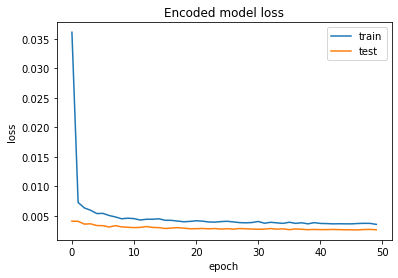

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995259914678464


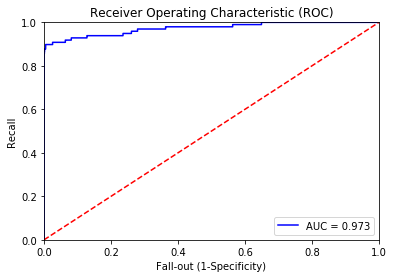

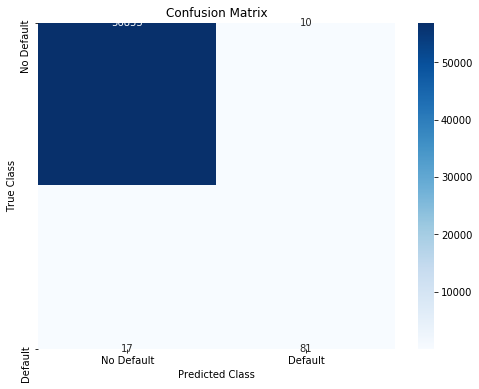

AUC(ROC): 0.913177375482138
Precision: 0.8901098901098901
Recall: 0.826530612244898
F1 score: 0.8571428571428572
False positives: 10
True positives: 81
False negatives: 17
True negatives: 56853
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 19s 84us/step - loss: 0.0015 - val_loss: 2.5257e-04
Epoch 2/150
227846/227846 [==============================] - 19s 82us/step - loss: 2.1636e-04 - val_loss: 1.8774e-04
Epoch 3/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.3936e-04 - val_loss: 1.3275e-04
Epoch 4/150
227846/227846 [==============================] - 19s 83us/step - loss: 1.2163e-04 - val_loss: 1.2075e-04
Epoch 5/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.1421e-04 - val_loss: 1.0492e-04
Epoch 6/150
227846/227846 [==============================] - 19s 82us/step - loss: 1.0177e-04 - val_loss: 9.8888e-05
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 19s 82us/step - loss: 3.8488e-05 - val_loss: 3.8627e-05
Epoch 69/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.7800e-05 - val_loss: 1.2961e-04
Epoch 70/150
227846/227846 [==============================] - 19s 81us/step - loss: 3.8021e-05 - val_loss: 3.7039e-05
Epoch 71/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.8119e-05 - val_loss: 3.9048e-05
Epoch 72/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.7702e-05 - val_loss: 3.7353e-05
Epoch 73/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.8000e-05 - val_loss: 3.6242e-05
Epoch 74/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.7703e-05 - val_loss: 3.6924e-05
Epoch 75/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.7405e-05 - val_loss: 3.7201e-05
Epoch 76/150
227846/227846 [==============================] - 19s 81u

227846/227846 [==============================] - 19s 82us/step - loss: 3.4248e-05 - val_loss: 3.8522e-05
Epoch 138/150
227846/227846 [==============================] - 18s 81us/step - loss: 3.4183e-05 - val_loss: 3.3327e-05
Epoch 139/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.4411e-05 - val_loss: 3.3674e-05
Epoch 140/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.3934e-05 - val_loss: 5.3571e-05
Epoch 141/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.3899e-05 - val_loss: 3.3141e-05
Epoch 142/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.3714e-05 - val_loss: 3.1475e-05
Epoch 143/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.3666e-05 - val_loss: 3.0889e-05
Epoch 144/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.4021e-05 - val_loss: 3.4714e-05
Epoch 145/150
227846/227846 [==============================] -

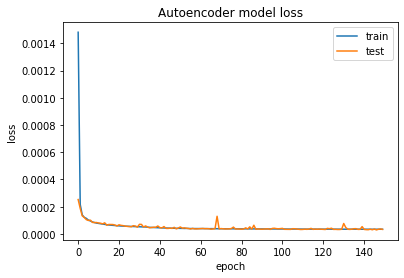

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 43s 190us/step - loss: 0.0351 - accuracy: 0.9909 - val_loss: 0.0076 - val_accuracy: 0.9984
Epoch 2/50
227846/227846 [==============================] - 41s 180us/step - loss: 0.0097 - accuracy: 0.9982 - val_loss: 0.0063 - val_accuracy: 0.9991
Epoch 3/50
227846/227846 [==============================] - 41s 181us/step - loss: 0.0070 - accuracy: 0.9987 - val_loss: 0.0054 - val_accuracy: 0.9992
Epoch 4/50
227846/227846 [==============================] - 41s 181us/step - loss: 0.0059 - accuracy: 0.9988 - val_loss: 0.0050 - val_accuracy: 0.9992
Epoch 5/50
227846/227846 [==============================] - 42s 184us/step - loss: 0.0053 - accuracy: 0.9990 - val_loss: 0.0048 - val_accuracy: 0.9992
Epoch 6/50
227846/227846 [==============================] - 43s 188us/step - loss: 0.0052 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9992
Epoch 7/50
227846/227846 [=================

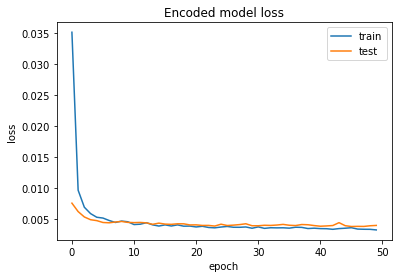

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992626533944278


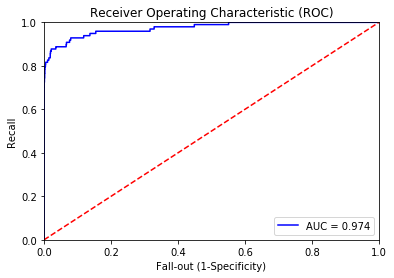

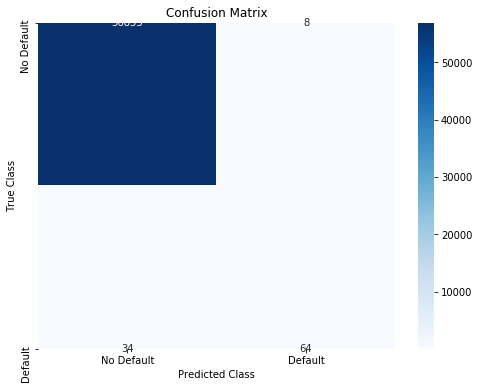

AUC(ROC): 0.8264602677326491
Precision: 0.8888888888888888
Recall: 0.6530612244897959
F1 score: 0.7529411764705882
False positives: 8
True positives: 64
False negatives: 34
True negatives: 56855
Fold #5
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
F:\Anaconda\lib\site-packages\sk

After OverSampling, the shape of train_X: (454904, 30)
After OverSampling, the shape of train_y: (454904,) 

After OverSampling, counts of label '1': 227452
After OverSampling, counts of label '0': 227452
Train on 227846 samples, validate on 56961 samples
Epoch 1/150
227846/227846 [==============================] - 19s 85us/step - loss: 0.0014 - val_loss: 2.8886e-04
Epoch 2/150
227846/227846 [==============================] - 19s 85us/step - loss: 2.2091e-04 - val_loss: 1.7513e-04
Epoch 3/150
227846/227846 [==============================] - 20s 86us/step - loss: 1.4476e-04 - val_loss: 1.3263e-04
Epoch 4/150
227846/227846 [==============================] - 20s 86us/step - loss: 1.2332e-04 - val_loss: 1.2001e-04
Epoch 5/150
227846/227846 [==============================] - 19s 85us/step - loss: 1.1438e-04 - val_loss: 1.0738e-04
Epoch 6/150
227846/227846 [==============================] - 19s 85us/step - loss: 1.0490e-04 - val_loss: 1.6284e-04
Epoch 7/150
227846/227846 [===================

227846/227846 [==============================] - 19s 82us/step - loss: 3.8287e-05 - val_loss: 3.9147e-05
Epoch 69/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.8292e-05 - val_loss: 3.8540e-05
Epoch 70/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.8333e-05 - val_loss: 3.6453e-05
Epoch 71/150
227846/227846 [==============================] - 19s 81us/step - loss: 3.8300e-05 - val_loss: 4.4226e-05
Epoch 72/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.8083e-05 - val_loss: 3.8387e-05
Epoch 73/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.7793e-05 - val_loss: 3.9020e-05
Epoch 74/150
227846/227846 [==============================] - 19s 82us/step - loss: 3.7951e-05 - val_loss: 3.5123e-05
Epoch 75/150
227846/227846 [==============================] - 19s 83us/step - loss: 3.7978e-05 - val_loss: 3.5870e-05
Epoch 76/150
227846/227846 [==============================] - 19s 82u

227846/227846 [==============================] - 19s 85us/step - loss: 3.2394e-05 - val_loss: 2.9519e-05
Epoch 138/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.2203e-05 - val_loss: 3.1258e-05
Epoch 139/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.2121e-05 - val_loss: 4.4142e-05
Epoch 140/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.2287e-05 - val_loss: 3.6667e-05
Epoch 141/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.2353e-05 - val_loss: 2.8980e-05
Epoch 142/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.2247e-05 - val_loss: 3.8778e-05
Epoch 143/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.1836e-05 - val_loss: 3.2170e-05
Epoch 144/150
227846/227846 [==============================] - 19s 85us/step - loss: 3.2210e-05 - val_loss: 6.8687e-05
Epoch 145/150
227846/227846 [==============================] -

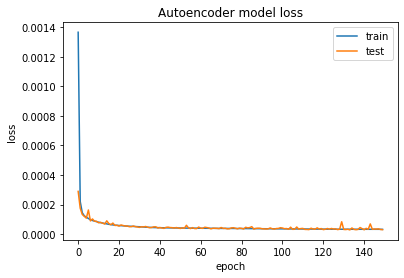

Train on 227846 samples, validate on 56961 samples
Epoch 1/50
227846/227846 [==============================] - 46s 200us/step - loss: 0.0411 - accuracy: 0.9882 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 2/50
227846/227846 [==============================] - 44s 194us/step - loss: 0.0075 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 3/50
227846/227846 [==============================] - 42s 182us/step - loss: 0.0058 - accuracy: 0.9992 - val_loss: 0.0049 - val_accuracy: 0.9992
Epoch 4/50
227846/227846 [==============================] - 41s 182us/step - loss: 0.0056 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 5/50
227846/227846 [==============================] - 42s 183us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 6/50
227846/227846 [==============================] - 42s 182us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 7/50
227846/227846 [=================

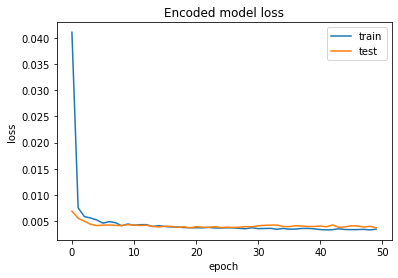

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679886237953


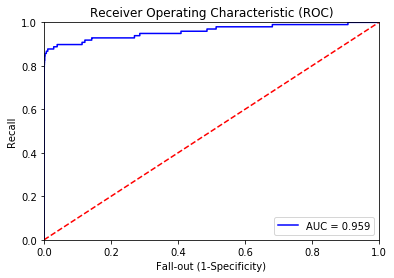

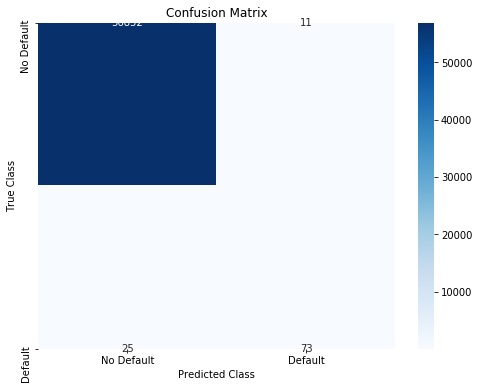

AUC(ROC): 0.8723522558874948
Precision: 0.8690476190476191
Recall: 0.7448979591836735
F1 score: 0.8021978021978022
False positives: 11
True positives: 73
False negatives: 25
True negatives: 56852


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(5, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = SVMSMOTE(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 56853.4
 Average fp = 9.6
 Average fn = 22.6
 Average tp = 75.8
 Average Precision = 0.8875878220140516
 Average Recall = 0.7703252032520325
 Average F1 score = 0.8248095756256801


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284267
 Total fp: 48
 Total fn: 113
 Total tp: 379
 Total Precision = 0.8875878220140515
 Total Recall = 0.7703252032520326
 Total F1_score = 0.8248095756256801


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 25821.248898506165 seconds ---
25821.248898506165


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

7.172569138473935
